In [56]:
def sample_Avcov_from_vcf(vcf_path, output_file):

    import vcf
    import numpy as np
    from matplotlib import pyplot as plt
    myvcf = vcf.Reader(open(vcf_path, 'r'))
    
    sample_cov = {}
    
    for record in myvcf:
        
        for sample in record.samples:
            if not sample['GT'] == "./.":  ## disregard missing loci!!
                if sample.sample not in sample_cov.keys():
                    sample_cov[sample.sample] = []
                else:
                    sample_cov[sample.sample].append(sample['DP'])
            else:
                pass
    
    fig = plt.figure(figsize = (15,10))
    
    
    sample_avgs = {}
    x = []
    xlabs = []
    y = []
    sample_count = 0
    for sample in sample_cov.keys():
        sample_count += 1
        average = np.round(np.mean(sample_cov[sample]), 2)
        x.append(sample_count)
        xlabs.append(sample)
        y.append(average)
        sample_avgs[sample] = average
        
    plt.bar(x,y, color = "royalblue", edgecolor = "none")
    plt.ylabel("Snp Coverage")
    plt.xticks(x, xlabs, rotation = "vertical")
    plt.show()
                  

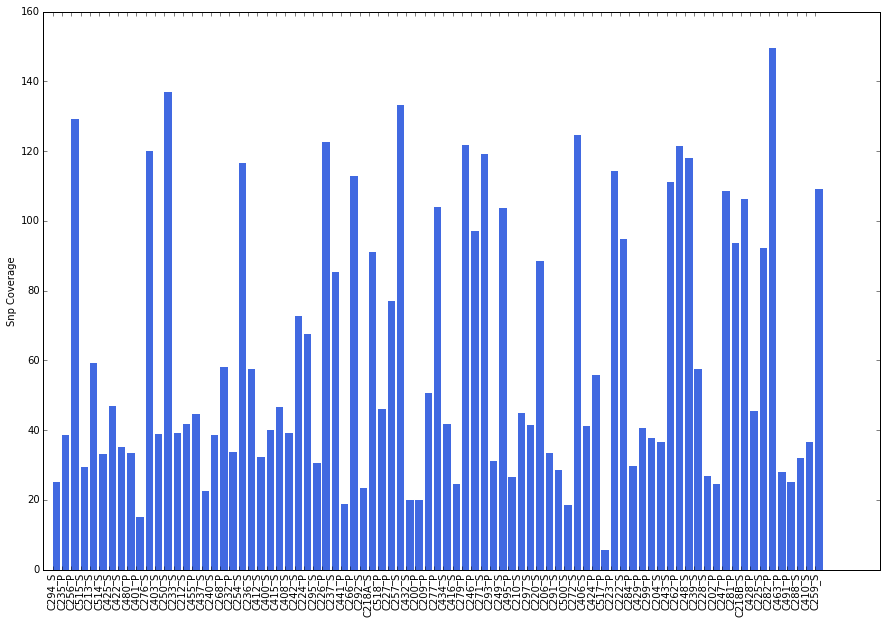

In [57]:
%matplotlib inline

sample_Avcov_from_vcf("/home/djeffrie/Data/Caspers_data/2lanes/Stacks_outs/Populations_all/batch_2.vcf.altered", "/home/djeffrie/Data/Caspers_data/2lanes/Stacks_outs/Populations_all/sample_average_coverages.txt")